I will define a poisson distribution to generate some number of diseases associated to genes:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Number = 30000
genes = [x for x in range(Number)]
associated_diseases = np.random.poisson(lam=10, size=Number)
diseases = np.floor(max(associated_diseases) + np.mean(associated_diseases))

df = pd.DataFrame({'genes':genes, 'ass_disseases':associated_diseases, 'diseases':diseases})
df.head()

,genes,ass_disseases,diseases
0,0,15,36.0
1,1,6,36.0
2,2,6,36.0
3,3,10,36.0
4,4,10,36.0


Now I will calculate:
 - David disease specificity index
 - DisGeNET disease specificity index
 
 How long does it take?

In [10]:
%time df['david'] = df.diseases / df.ass_disseases
%time df['disgenet'] = np.log2(df.ass_disseases/df.diseases)/np.log2(1/df.diseases)

CPU times: user 2.54 ms, sys: 1.57 ms, total: 4.1 ms
Wall time: 2.27 ms
CPU times: user 4.28 ms, sys: 1.45 ms, total: 5.73 ms
Wall time: 3.94 ms


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


In [11]:
df.head()

,genes,ass_disseases,diseases,david,disgenet
0,0,15,36.0,2.4,0.244304
1,1,6,36.0,6.0,0.500000
2,2,6,36.0,6.0,0.500000
3,3,10,36.0,3.6,0.357451
4,4,10,36.0,3.6,0.357451


Is the ranking the same?

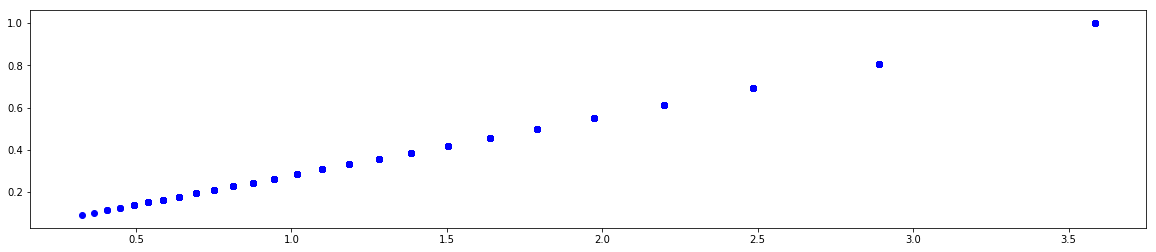

In [12]:
x = [x for x in range(35)]

plt.figure(figsize = (20,4))
plt.scatter(np.log(df.david), df.disgenet, color = 'b')
plt.show()

In [22]:
rank1 = df[['genes','david']].sort_values('david')['genes']
rank2 = df[['genes','david']].sort_values('')['genes']

rank1 == rank2

27139    True
26451    True
29425    True
25261    True
23668    True
177      True
23295    True
4331     True
3408     True
7535     True
6384     True
16809    True
6658     True
29417    True
6790     True
27362    True
27293    True
3308     True
24344    True
20868    True
23777    True
23785    True
2153     True
21965    True
3948     True
25675    True
16953    True
27799    True
9130     True
5170     True
         ... 
18313    True
27382    True
3049     True
5626     True
24405    True
5177     True
908      True
4780     True
22684    True
29061    True
9371     True
5990     True
12976    True
4254     True
26993    True
1895     True
7950     True
11929    True
22597    True
23219    True
10739    True
430      True
561      True
8049     True
12932    True
17897    True
21247    True
4132     True
23842    True
151      True
Name: genes, Length: 30000, dtype: bool